# Description
This is a **SDN specific data set** generated by using mininet emulator and used for **traffic classification** by machine learning and deep learning algorithms.  The project start by creating ten topologies in mininet in which switches are connected to single Ryu controller.  Network simulation runs for benign TCP, UDP and ICMP traffic and malicious traffic which is the collection of **TCP Syn attack, UDP Flood attack, ICMP attack**. Total **23 features **are available in the data set in which some are extracted from the switches  and others are calculated. Extracted features include Switch-id, Packet_count, byte_count, duration_sec, duration_nsec which is duration in nano-seconds, total duration is sum of duration_sec and durstaion_nsec, Source IP, Destination IP, Port number, tx_bytes is the number of bytes transferred from the switch port, rx_bytes is the number of bytes received on  the switch port. dt field show the date and time which has been converted into number and a flow is monitored at a monitoring interval of 30 second. Calculated features include Packet per flow which is packet count during a single flow, Byte per flow is byte count during a single flow, Packet Rate is number of packets send per second and calculated by dividing the packet per flow by monitoring interval, number of Packet_ins messages, total flow entries in the switch, tx_kbps, rx_kbps are data transfer and receiving rate and Port  Bandwidth is the sum of tx_kbps and rx_kbps.
Last column indicates the class label which indicates whether the traffic type is benign or malicious. Benign traffic has label 0 and malicious traffic has label 1.  Network simulation is run for 250 minutes and 1,04,345 rows of data is collected. The simulation is run for defined interval again and more data can be collected.

In [ ]:
df=pd.read_csv("/kaggle/input/ddos-sdn-dataset/dataset_sdn.csv")

In [ ]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [ ]:
df['Protocol'].value_counts(),df['src'].value_counts(),df['dst'].value_counts()

(Protocol
 ICMP    41321
 UDP     33588
 TCP     29436
 Name: count, dtype: int64,
 src
 10.0.0.3     11491
 10.0.0.7     10313
 10.0.0.10     9671
 10.0.0.1      8645
 10.0.0.12     8147
 10.0.0.2      8063
 10.0.0.5      7291
 10.0.0.9      7209
 10.0.0.11     6455
 10.0.0.4      5999
 10.0.0.8      5241
 10.0.0.6      2740
 10.0.0.18     2590
 10.0.0.13     2484
 10.0.0.14     2265
 10.0.0.15     1858
 10.0.0.16     1789
 10.0.0.20     1114
 10.0.0.17      980
 Name: count, dtype: int64,
 dst
 10.0.0.7     18020
 10.0.0.8     15587
 10.0.0.5     15184
 10.0.0.3     13051
 10.0.0.9      6318
 10.0.0.12     5635
 10.0.0.2      4990
 10.0.0.1      4645
 10.0.0.4      3963
 10.0.0.10     3926
 10.0.0.11     3370
 10.0.0.14     2007
 10.0.0.15     1765
 10.0.0.16     1684
 10.0.0.6      1590
 10.0.0.13     1076
 10.0.0.18      790
 10.0.0.17      744
 Name: count, dtype: int64)

In [ ]:
# df1=pd.get_dummies(df,drop_first=True)

In [ ]:
# df1.info()

/tmp/ipykernel_30/4191100140.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


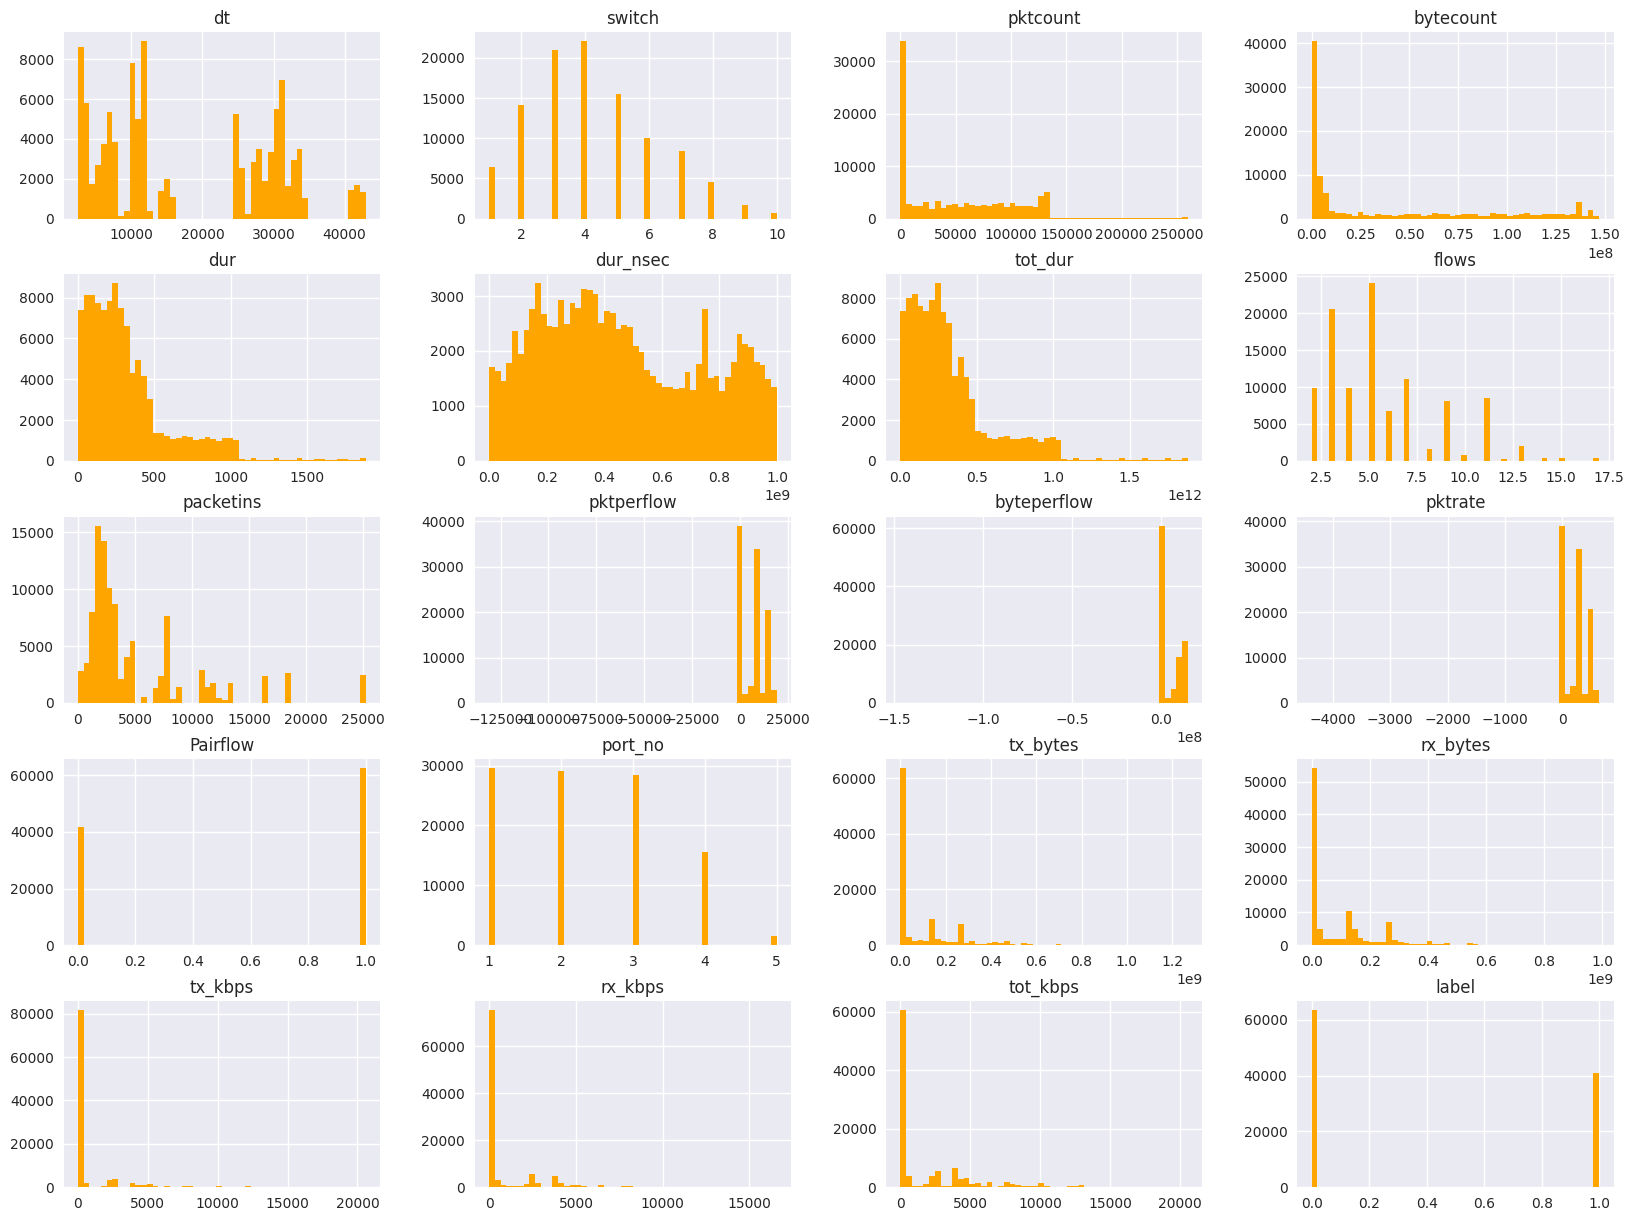

In [ ]:
## Plot desnity plot for all features
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [ ]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [ ]:
# ## Check for multicollinearity
# plt.figure(figsize=(18,10))
# corr=df.corr()
# sns.heatmap(corr,annot=True)

In [ ]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
X=df.drop(['src', 'dst', 'Protocol','label'],axis=1)
y=df['label']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   pktcount     103839 non-null  int64  
 3   bytecount    103839 non-null  int64  
 4   dur          103839 non-null  int64  
 5   dur_nsec     103839 non-null  int64  
 6   tot_dur      103839 non-null  float64
 7   flows        103839 non-null  int64  
 8   packetins    103839 non-null  int64  
 9   pktperflow   103839 non-null  int64  
 10  byteperflow  103839 non-null  int64  
 11  pktrate      103839 non-null  int64  
 12  Pairflow     103839 non-null  int64  
 13  port_no      103839 non-null  int64  
 14  tx_bytes     103839 non-null  int64  
 15  rx_bytes     103839 non-null  int64  
 16  tx_kbps      103839 non-null  int64  
 17  rx_kbps      103839 non-null  float64
 18  tot_kbps     103839 non-null 

In [ ]:
y.info(),y.value_counts()

<class 'pandas.core.series.Series'>
Index: 103839 entries, 0 to 104344
Series name: label
Non-Null Count   Dtype
--------------   -----
103839 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


(None,
 label
 0    63335
 1    40504
 Name: count, dtype: int64)

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2529,stratify=y)

In [ ]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72687 entries, 78533 to 73453
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           72687 non-null  int64  
 1   switch       72687 non-null  int64  
 2   pktcount     72687 non-null  int64  
 3   bytecount    72687 non-null  int64  
 4   dur          72687 non-null  int64  
 5   dur_nsec     72687 non-null  int64  
 6   tot_dur      72687 non-null  float64
 7   flows        72687 non-null  int64  
 8   packetins    72687 non-null  int64  
 9   pktperflow   72687 non-null  int64  
 10  byteperflow  72687 non-null  int64  
 11  pktrate      72687 non-null  int64  
 12  Pairflow     72687 non-null  int64  
 13  port_no      72687 non-null  int64  
 14  tx_bytes     72687 non-null  int64  
 15  rx_bytes     72687 non-null  int64  
 16  tx_kbps      72687 non-null  int64  
 17  rx_kbps      72687 non-null  float64
 18  tot_kbps     72687 non-null  float64
dtypes: fl

(None, None)

In [ ]:
y_train.value_counts(),y_test.value_counts()

(label
 0    44334
 1    28353
 Name: count, dtype: int64,
 label
 0    19001
 1    12151
 Name: count, dtype: int64)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<Axes: >

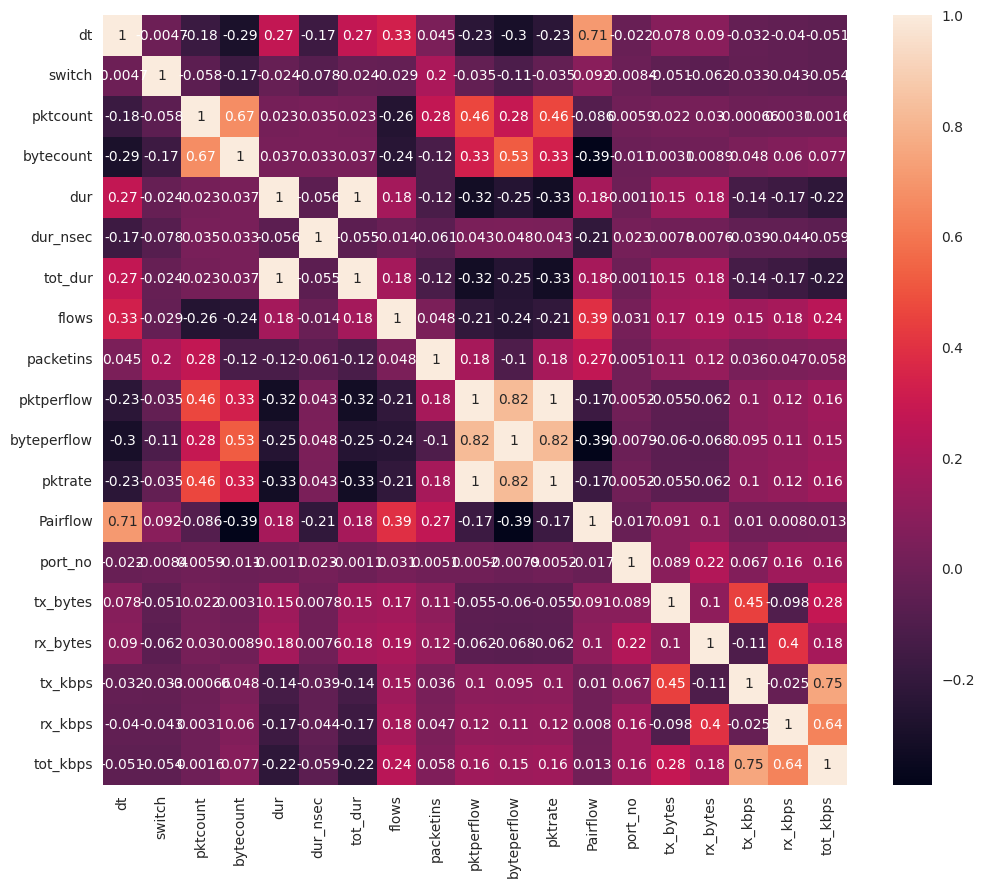

In [ ]:
# Check for multicollinearity
plt.figure(figsize=(12,10))

corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
# threshold--Domain expertise
corr_features=correlation(X_train,0.70)

In [ ]:
corr_features

{'Pairflow', 'byteperflow', 'pktrate', 'tot_dur', 'tot_kbps'}

In [ ]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((72687, 14), (31152, 14))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
mm=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

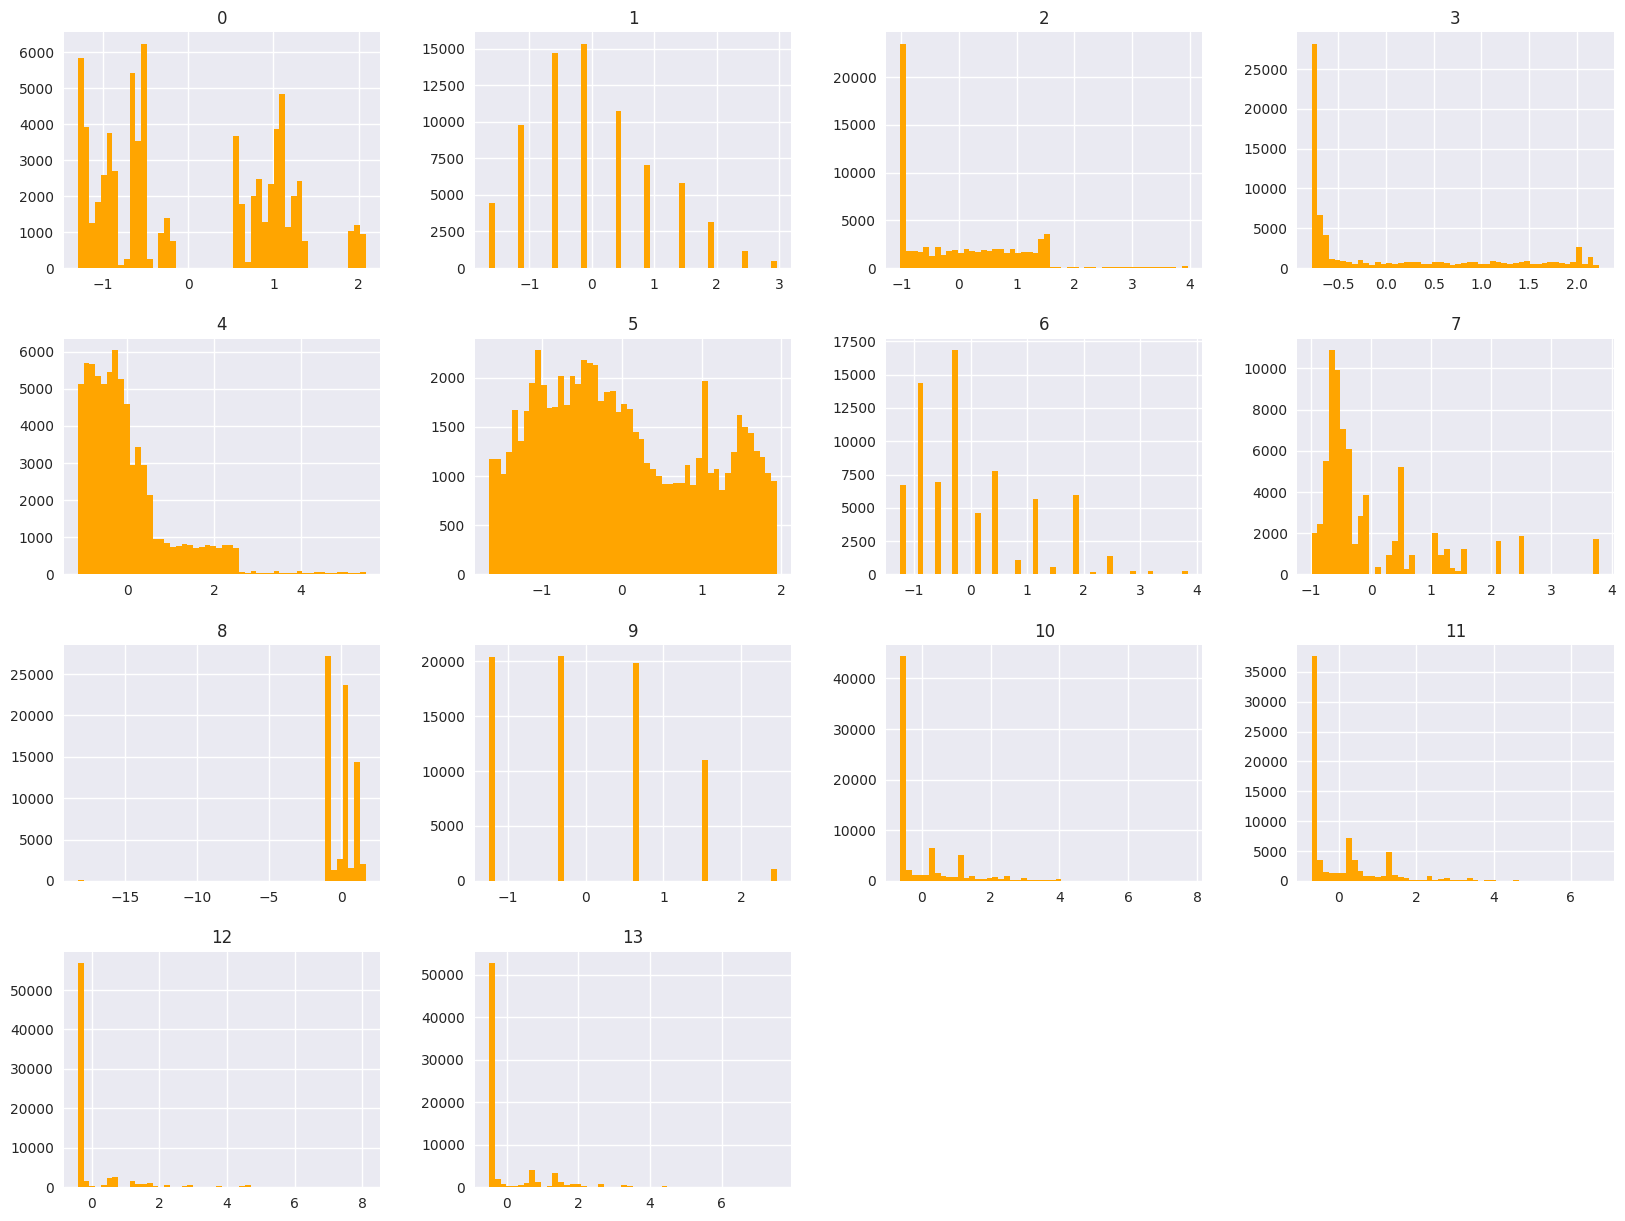

In [ ]:
## Plot desnity plot for all features
plt.style.use('seaborn')
pd.DataFrame(X_train_scaled).hist(bins=50,figsize=(20,15),color='orange')
plt.show()

Text(0.5, 1.0, 'X_train After Scaling')

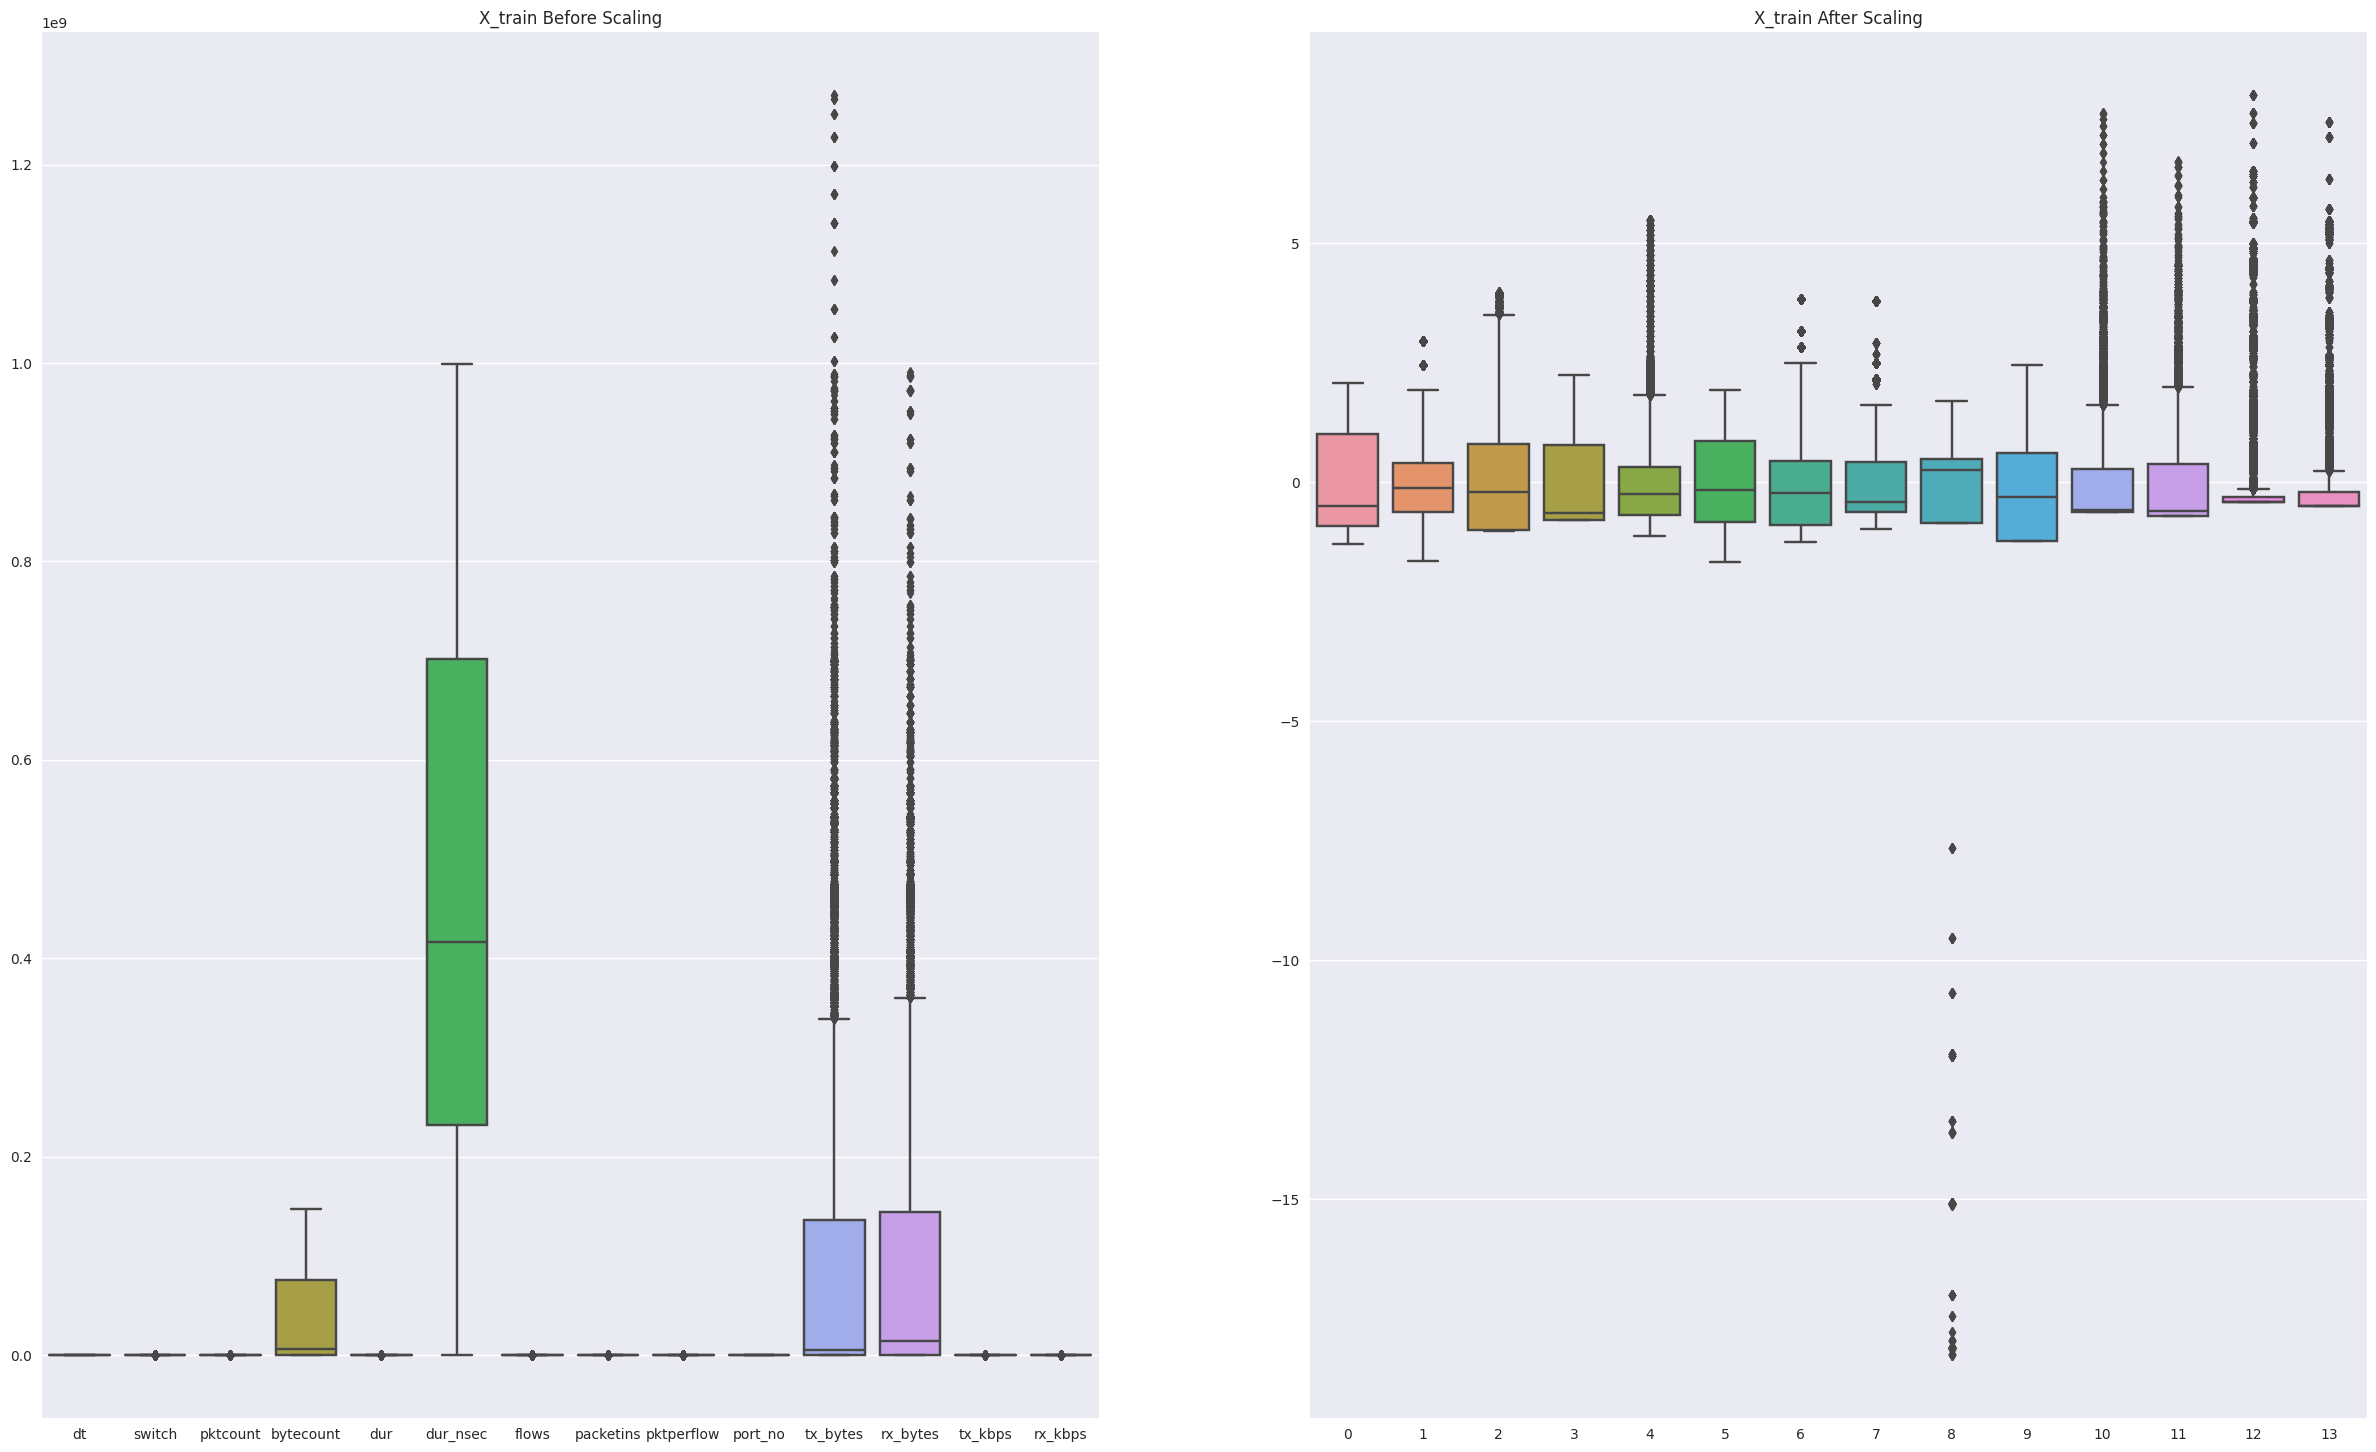

In [ ]:
plt.subplots(figsize=(30, 18))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
models={

    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(),
    "Gausian":GaussianNB(),
    "Bernoulli":BernoulliNB(),
    "knn"    :KNeighborsClassifier(),
    "svm"    :SVC() #we can't use svm because of high computation
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)



      # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred) # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision, add average='weighted'
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall, add average='weighted'
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred) #Calculate Roc, add multi_class='ovr'


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred) # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision, add average='weighted'
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall, add average='weighted'
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc, add multi_class='ovr'


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7302
- F1 score: 0.6175
- Precision: 0.6907
- Recall: 0.5584
- Roc Auc Score: 0.6992
----------------------------------
Model performance for Test set
- Accuracy: 0.7369
- F1 score: 0.6273
- Precision: 0.7009
- Recall: 0.5677
- Roc Auc Score: 0.7064


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
- Roc Auc Score: 1.0000


Gradient Boost
Model performance for Training se